In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import numpy as np

In [2]:
root = Path.cwd().parent

five_fold_results_dir = root / "RESULTS_fiveFold" / "results"
five_fold_aggregated_csv = five_fold_results_dir / "results5Fold_summary_combined.csv" 

df = pd.read_csv(five_fold_aggregated_csv)

C:\Users\Muhammad Imran\AppData\Local\Temp\ipykernel_20488\582909785.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['Group'] = 'without Execution Time'
C:\Users\Muhammad Imran\AppData\Local\Temp\ipykernel_20488\582909785.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2['Group'] = 'with Execution Time'


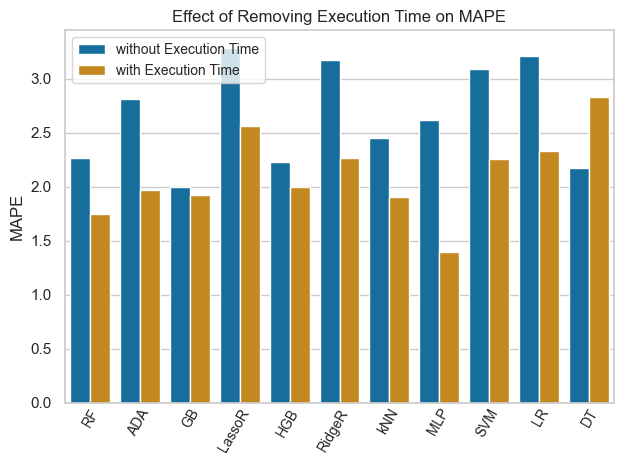

In [3]:
# Set style
sns.set(style="whitegrid")
palette = 'colorblind'

# Filter Group 1: with dropExecTime = True
group1 = df[df['dropExecTime'] == True]


# Filter Group 2: dropExecTime = FALSE AND rfecv, kbest, autospearman = FALSE
group2 = df[
    (df['lowVarianceDrop'] == False) &
    (df['rfecv'] == False) &
    (df['kbest'] == False) &
    (df['autospearman'] == False) &
    (df['dropExecTime'] == False)
]

group1['Group'] = 'without Execution Time'
group2['Group'] = 'with Execution Time'

combined = pd.concat([group1, group2], ignore_index=True)

model_order = (
combined.groupby("model_name")["r2_mean"]
.mean()
.sort_values(ascending=False)
.index.tolist()
)

# --- MAPE Plot ---
sns.barplot(data=combined, x="model_name", y="mape_mean", hue="Group", order=model_order, palette=palette)
plt.ylabel("MAPE")
plt.xlabel(None)
plt.title("Effect of Removing Execution Time on MAPE")
plt.legend(title=None)
plt.xticks(rotation=60, ha='right', fontsize=10, rotation_mode='anchor')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tick_params(axis='x', which='major', pad=-3.5)
plt.tight_layout()
plt.legend(title=None, fontsize=10)
# plt.savefig(os.path.join(plots_path, 'rmse_by_model.pdf'), format='pdf', bbox_inches='tight')
plt.show()

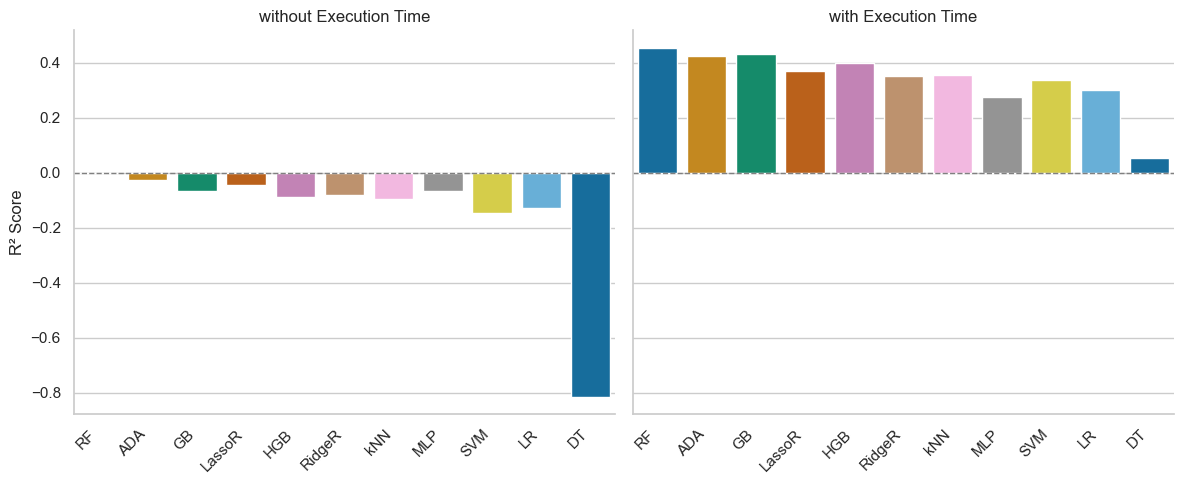

In [4]:
# Consistent model order based on average R²
# model_order = (
#     combined.groupby("model_name")["r2_mean"]
#     .mean()
#     .sort_values(ascending=False)
#     .index.tolist()
# )
# Filter models where all feature selection techniques are False
df_all_features = df[(df['lowVarianceDrop'] == False) &
                    (df['rfecv'] == False) &
                    (df['kbest'] == False) &
                    (df['autospearman'] == False) &
                    (df['hyperparameters'] == False)]
# Now we can sort the models based on R2 score with all features
model_order = df_all_features.groupby('model_name')['r2_mean'].mean().sort_values(ascending=False).index.tolist()

# # Ensure correct group names are used
# combined["Group"] = combined["Group"].replace({
#     "without Execution Time": "Excluding Execution Time",
#     "with Execution Time": "Including Execution Time"
# })

# Plot with FacetGrid
g = sns.catplot(
    data=combined,
    kind="bar",
    x="model_name",
    y="r2_mean",
    col="Group",
    order=model_order,
    col_order=["without Execution Time", "with Execution Time"],
    sharey=True,
    palette=palette,
    height=5,
    aspect=1.2,
    # edgecolor="black"
)

# Style tweaks
g.set_titles("{col_name}", size=12)
g.set_axis_labels("", "R² Score")
g.set_xticklabels(rotation=45, ha='right', fontsize=11)
for ax in g.axes.flat:
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.savefig("plt_RQ2b_dropExecTime_R2_facetted.pdf", bbox_inches='tight')
plt.show()


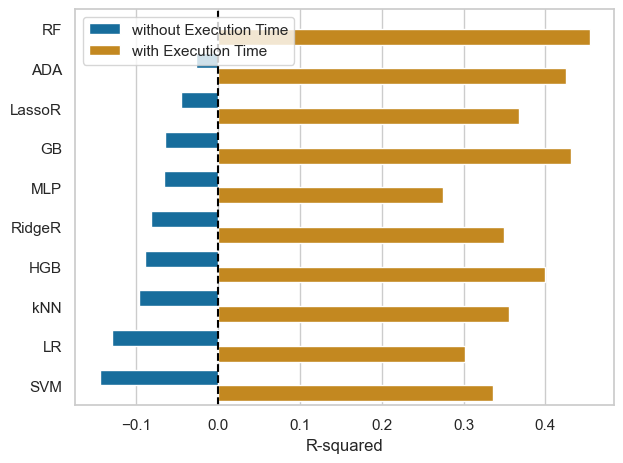

In [5]:
# Set seaborn style
sns.set(style="whitegrid")
palette = 'colorblind'

#drop model DT from combined
combined = combined[combined['model_name'] != 'DT']

plt.figure()
ax = sns.barplot(
    data=combined,
    y="model_name",
    x="r2_mean",
    hue="Group",
    # order=model_order[::-1],  # Optional reverse
    palette=palette
)

ax.axvline(0, color='black', linestyle='--')
ax.set_xlabel("R-squared")
ax.set_ylabel("")
# ax.set_title("Effect of Removing Execution Time on R-squared", fontsize=12)
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("plt_RQ2b_dropExecTime_R2_horizontal.pdf", bbox_inches='tight')
plt.show()


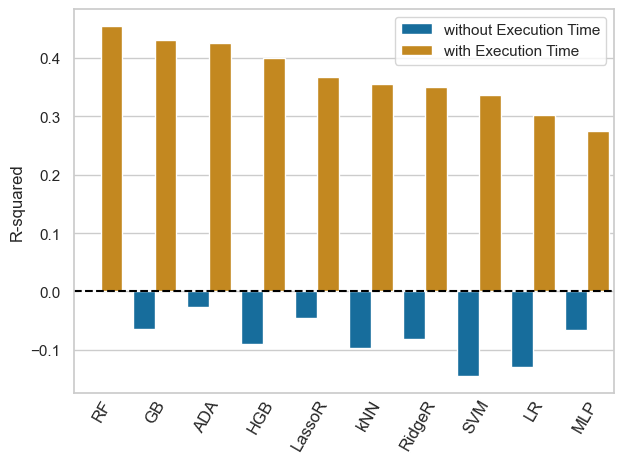

In [6]:
# Set seaborn style
sns.set(style="whitegrid")
palette = 'colorblind'

# Drop DT model from the combined DataFrame
combined = combined[combined['model_name'] != 'DT']

# Get model order sorted by "with Execution Time"
sorted_models = (
    combined[combined['Group'] == 'with Execution Time']
    .sort_values(by='r2_mean', ascending=False)['model_name']
    .tolist()
)

# Plot with sorted order
plt.figure()
ax = sns.barplot(
    data=combined,
    x="model_name",
    y="r2_mean",
    hue="Group",
    order=sorted_models,
    palette=palette
)

# Draw horizontal reference line at y=0
ax.axhline(0, color='black', linestyle='--')

# Axis labeling
ax.set_ylabel("R-squared")
ax.set_xlabel("")

# Rotate x-axis labels for readability
plt.xticks(rotation=60, ha='right', fontsize=12, rotation_mode='anchor')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tick_params(axis='x', which='major', pad=-3.5)

# Final layout tweaks
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("plt_RQ2b_dropExecTime_R2_vertical.pdf", bbox_inches='tight')
plt.show()
